In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [49]:
titanic = pd.read_csv('titanic.csv')
titanic.loc[titanic['Age'] <= 10,'Age'] = None
titanic.loc[titanic['Age'].isnull(),'Age'] = titanic['Age'].mean()
titanic_unique = titanic['Age'].unique()

AttributeError: module 'pandas' has no attribute 'Dataframe'

In [75]:
# linear regression between between fare and age
Age = []
Fare = []
titanic_unique

array([22.        , 38.        , 26.        , 35.        , 32.20307692,
       54.        , 27.        , 14.        , 58.        , 20.        ,
       39.        , 55.        , 31.        , 34.        , 15.        ,
       28.        , 19.        , 40.        , 66.        , 42.        ,
       21.        , 18.        , 49.        , 29.        , 65.        ,
       28.5       , 11.        , 45.        , 17.        , 32.        ,
       16.        , 25.        , 30.        , 33.        , 23.        ,
       24.        , 46.        , 59.        , 71.        , 37.        ,
       47.        , 14.5       , 70.5       , 32.5       , 12.        ,
       36.5       , 51.        , 55.5       , 40.5       , 44.        ,
       61.        , 56.        , 50.        , 36.        , 45.5       ,
       20.5       , 62.        , 41.        , 52.        , 63.        ,
       23.5       , 43.        , 60.        , 64.        , 13.        ,
       48.        , 53.        , 57.        , 80.        , 70.  

In [110]:
for value in titanic_unique:
    Age.append(value)
    Fare.append(titanic.loc[titanic['Age'] == value,'Fare'].mean())
Fare[4] = 30.46

In [114]:
newTitanic = pd.DataFrame()
newTitanic['Age'] = Age
newTitanic['Fare'] = Fare
newTitanic['Fare'] = newTitanic['Fare'].fillna(newTitanic['Fare'].mean())
newTitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     296 non-null    float64
 1   Fare    296 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [118]:
X = newTitanic.iloc[:,:-1].values
y = newTitanic.iloc[:,1].values

In [119]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)


In [120]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [122]:
y_pred = regressor.predict(X_test)
y_pred

array([39.45364097, 30.55163215, 31.70027845, 39.1664794 , 43.04316066,
       33.27966711, 28.25433955, 28.68508192, 36.58202522, 41.17661042,
       44.04822617, 30.83879373, 32.70534396, 33.71040947, 36.8691868 ,
       32.56176318, 31.55669766, 37.44350995, 38.0178331 , 39.74080255,
       37.15634837, 43.18674144, 26.5313701 , 40.02796412, 40.60228727,
       40.3151257 , 26.81853168, 31.1259553 , 37.73067152, 38.0178331 ,
       39.45364097, 37.73067152, 43.04316066, 38.59215625, 26.24420853,
       26.96211247, 38.30499467, 31.1259553 , 35.7205405 , 41.75093357,
       31.41311688, 31.41311688, 43.04316066, 40.88944884, 26.81853168,
       40.88944884, 29.11582428, 38.59215625, 31.98744003, 44.04822617,
       31.1259553 , 42.89957987, 25.95704695, 27.10569325, 28.25433955,
       45.77119562, 38.73573703, 31.70027845, 39.1664794 , 40.88944884,
       35.14621735, 41.17661042, 27.6800164 , 29.83372821, 28.8286627 ,
       37.44350995, 32.04575591, 29.11582428, 30.98237451, 35.72

In [123]:
y_test

array([ 93.90166   ,  30.36133889,  37.00907059,  11.425     ,
         7.75      ,  26.        ,  27.869496  ,   7.25      ,
        37.89306667, 144.5       ,   7.775     ,  21.02016   ,
         6.4375    ,  62.75150909,  59.92918333,  16.63638667,
         7.9       ,  28.75238571,  51.4792    ,  10.375     ,
        64.02583   ,  42.0792    ,  13.3646    ,  55.        ,
        35.9       ,  24.01943333,  42.6257    ,  27.090825  ,
        51.40278333,  51.4792    ,  93.90166   ,  51.40278333,
         7.75      ,  23.25      ,  11.2417    ,  14.4542    ,
        44.4770875 ,  27.090825  ,  36.81840833,  10.5       ,
        25.541668  ,  25.541668  ,   7.75      ,  43.7729    ,
        42.6257    ,  43.7729    ,  25.50478148,  23.25      ,
        24.32337778,   7.775     ,  27.090825  ,  40.75      ,
        54.240625  ,  49.65502   ,  27.869496  ,  30.        ,
         8.05      ,  37.00907059,  11.425     ,  43.7729    ,
        59.7975    , 144.5       ,  28.38942308,   8.05

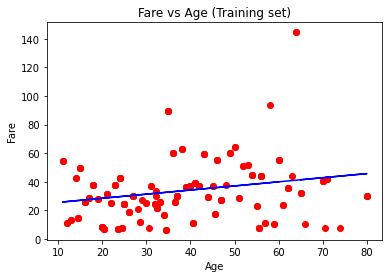

In [125]:
plt.scatter(X_train, y_train, color='red') # plotting the observation line
 
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
 
plt.title("Fare vs Age (Training set)") # stating the title of the graph
 
plt.xlabel("Age") # adding the name of x-axis
plt.ylabel("Fare") # adding the name of y-axis
plt.show() # specifies end of graph